In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cars=pd.read_csv("/Users/alfia/Desktop/CarPricePrediction/cars.csv")
cars.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [4]:
cars.shape

(8128, 13)

In [5]:
cars.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [6]:
cars=cars.dropna(how="any")

In [7]:
cars.shape

(7906, 13)

In [8]:
import re

In [9]:
torque_list=cars['torque'].to_list()
torque_rpm=[]
def extractingRPM(x):
    for i in x:
        res=i.replace(".","")
        res=i.replace(",","")
        temp = [int(s) for s in re.findall(r'\d+',res)]
        torque_rpm.append(max(temp))
extractingRPM(torque_list)

In [10]:
torque_list[:2]

['190Nm@ 2000rpm', '250Nm@ 1500-2500rpm']

In [11]:
torque_rpm[:2]

[2000, 2500]

In [12]:
cars['torque_rpm']=torque_rpm

In [13]:
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500


In [14]:
cars['engines'] = cars['engine'].astype('str').str.extractall('(\d+)').unstack().fillna('.').sum(axis=1)

In [15]:
cars.engines=cars.engines.apply(int)

In [16]:
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,engines
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,1248
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,1498


In [17]:
#cars['mileages'] = cars['mileage'].str.replace('kmpl', '')
#Super
#cars['mileages'] = cars['mileage'].str.replace('km/kg', '')

In [18]:
mil_list=cars['mileage'].to_list()
mil_kmpl=[]
def extract(x):
    for i in x:
        temp=[]
        try:
            for s in i.split(" "):
                temp.append(float(s))
        except:
            mil_kmpl.append(max(temp))
extract(mil_list)

In [20]:
cars['mileages']=mil_kmpl

In [21]:
cars['max_powers']=cars['max_power'].astype('str').str.extractall('(\d+)').unstack().fillna('.').sum(axis=1)

In [22]:
cars.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,torque_rpm,engines,mileages,max_powers
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,2000,1248,23.40,74.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,2500,1498,21.14,10352.0


In [23]:
df= cars.drop(['mileage','engine','max_power','torque'],axis=1)

In [24]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,seats,torque_rpm,engines,mileages,max_powers
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,5.0,2000,1248,23.40,74.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,5.0,2500,1498,21.14,10352.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,5.0,2700,1497,17.70,78.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,5.0,2750,1396,23.00,90.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,5.0,4500,1298,16.10,882.0


In [25]:
df.describe()

,year,selling_price,km_driven,seats,torque_rpm,engines,mileages,max_powers
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000,7906.000000,7906.000000,7906.000000,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393,3069.864154,1458.708829,19.419861,2766.125348
std,3.863695,8.135827e+05,5.679230e+04,0.959208,943.662100,503.893057,4.036263,5162.123778
min,1994.000000,2.999900e+04,1.000000e+00,2.000000,400.000000,624.000000,0.000000,35.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000,2400.000000,1197.000000,16.780000,100.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000,3000.000000,1248.000000,19.300000,739.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000,4000.000000,1582.000000,22.320000,3748.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000,21800.000000,3604.000000,42.000000,108495.000000


<AxesSubplot:>

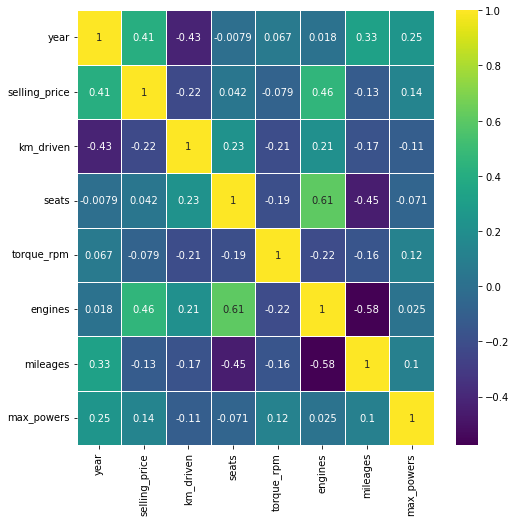

In [26]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True,cmap="viridis",linewidths=.5)

In [28]:
from sklearn.preprocessing import LabelEncoder
le_f=LabelEncoder()
le_s=LabelEncoder()
le_t=LabelEncoder()
le_o=LabelEncoder()
df['Fuel']=le_f.fit_transform(df.fuel)
df['Seller_type']=le_s.fit_transform(df.seller_type)
df['Transmission']=le_t.fit_transform(df.transmission)
df['Owner']=le_o.fit_transform(df.owner)

In [30]:
df=df.drop(['name','fuel','seller_type','transmission','owner'],axis=1)

In [32]:
x = df.drop('selling_price',axis=1)
y = df.selling_price

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [35]:
x.shape

(7906, 11)

In [36]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [39]:
random_model=RandomForestRegressor(n_estimators=300,random_state=43,
                                  n_jobs=-1)

In [40]:
random_model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=300, n_jobs=-1, random_state=43)

In [41]:
y_pred=random_model.predict(x_test)

In [42]:
random_model.score(x_train,y_train)

0.9940293895813227

In [43]:
random_model.score(x_test,y_test)

0.953667294397563

In [44]:
import pickle
model=pickle.dump(random_model,open('/Users/alfia/Desktop/r.pickle','wb'))

In [46]:
x.head(2)

,year,km_driven,seats,torque_rpm,engines,mileages,max_powers,Fuel,Seller_type,Transmission,Owner
0,2014,145500,5.0,2000,1248,23.40,74.0,1,1,1,0
1,2014,120000,5.0,2500,1498,21.14,10352.0,1,1,1,2


In [48]:
y.head()

0    450000
1    370000
2    158000
3    225000
4    130000
Name: selling_price, dtype: int64

In [49]:
random_model.predict([[2014,145500,5.0,2000,1248,23.40,74.0,1,1,1,0]])

array([494429.93666667])